<a href="https://colab.research.google.com/github/AnaghaNithin/DSA-PythonCaseStudy/blob/main/Assignment_On_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# 1. Read the dataset to python environment

df = pd.read_excel('/content/iris (2).xls')

In [59]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [62]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [63]:
df.isnull().sum()

,0
SL,7
SW,6
PL,6
PW,0
Classification,0


In [64]:
# 2. Do the necessary pre-processing steps


df.dropna()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [65]:
# Handle missing values by replacing them with the column mean

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])


In [66]:
# Encode categorical target variable

from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
df['Classification'] = label_encoder.fit_transform(df['Classification'])

In [67]:
# Feature-target split
X = df.drop('Classification', axis=1)
y = df['Classification']

In [68]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
# Train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [70]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("\nLogistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Logistic Regression
Accuracy: 0.9667
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [71]:
# K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("\nK-Nearest Neighbors")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



K-Nearest Neighbors
Accuracy: 0.9667
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [72]:
# Support Vector Machine

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("\nSupport Vector Machine")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Support Vector Machine
Accuracy: 0.9667
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [73]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("\nDecision Tree")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Decision Tree
Accuracy: 1.0000
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [74]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("\nRandom Forest")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest
Accuracy: 1.0000
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [75]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("\nNaive Bayes")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Naive Bayes
Accuracy: 1.0000
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [79]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    GaussianNB(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    KNeighborsClassifier(),
    LogisticRegression()]

# Logging for Visual Comparison
log_cols = ["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    ll = log_loss(y_test, clf.predict_proba(X_test)) if hasattr(clf, "predict_proba") else None
    print(f"Accuracy: {acc:.4%}")

    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = pd.concat([log, log_entry], ignore_index=True)

    print("="*30)


GaussianNB
****Results****
Accuracy: 100.0000%
RandomForestClassifier
****Results****
Accuracy: 100.0000%
DecisionTreeClassifier
****Results****
Accuracy: 100.0000%
SVC
****Results****
Accuracy: 96.6667%
KNeighborsClassifier
****Results****
Accuracy: 96.6667%
LogisticRegression
****Results****
Accuracy: 96.6667%


<ipython-input-79-354f9939e9e3>:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  log = pd.concat([log, log_entry], ignore_index=True)
<ipython-input-79-354f9939e9e3>:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  log = pd.concat([log, log_entry], ignore_index=True)


<ipython-input-77-978215304eef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy', ascending=False), palette='viridis')


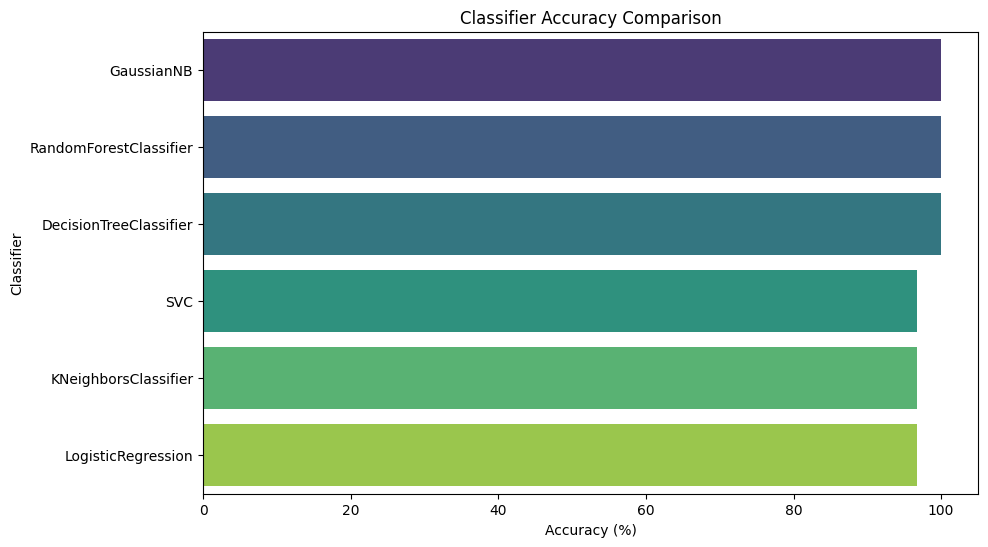

In [77]:
# Visualize the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy', ascending=False), palette='viridis')
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Accuracy (%)')
plt.ylabel('Classifier')
plt.show()

In [78]:
# Find and print the best model

model_performance = {}
best_model = max(model_performance, key=model_performance.get) if model_performance else log.iloc[log['Accuracy'].idxmax()]['Classifier']
print(f"\nThe best classification model is: {best_model}")


The best classification model is: GaussianNB
